In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import os

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

FILE = "ruas_count.shp"

DATA_DIR = "DATA"
DATA_PATH = os.path.join('..',DATA_DIR, FILE)

DATA_PATH

'../DATA/ruas_count.shp'

In [4]:
%matplotlib inline

In [5]:
%matplotlib notebook

In [6]:
graph = gpd.read_file(DATA_PATH)
graph.head()

,osm_id,name,ref,type,oneway,bridge,maxspeed,length,NUMPOINTS,COUNT,geometry
0,29134586.0,Avenida Beira Mar,None,primary,1,0,None,27,0.0,3,LINESTRING (577532.3245794059 9720883.66956847...
1,29138030.0,None,None,primary_link,1,0,None,109,5.0,1,LINESTRING (578703.2024143914 9720770.18590053...
2,46218164.0,None,None,residential,1,0,None,141,0.0,1,LINESTRING (577734.7292404751 9719147.99763644...
3,46218166.0,None,None,residential,1,0,None,69,0.0,1,LINESTRING (577792.4842331782 9719270.78795546...
4,46218179.0,Rua das Cajazeiras,None,secondary,1,0,None,156,1.0,1,LINESTRING (577675.8305807926 9719706.85592203...


## Opcional: Apenas Testes

In [7]:
# graph['id'] = graph.index

In [8]:
# line = graph[['id','name','osm_id','geometry']].head()[:1]['geometry']

In [9]:
# print(line[0])

In [10]:
# graph[graph['NUMPOINTS'] > 0].describe()

# Gerando o grafo a partir do shapefile

In [11]:
G = nx.read_shp(DATA_PATH)
# first edges
first = G.edges()[0]
# first

In [12]:
len(G.nodes())

865

## Gerando nodelist

In [13]:
# Nessa célula estou colocando o resultado de G.nodes() num dict
from itertools import count

node_list_dict = {pt: i for i, pt in zip(count(), G.nodes())}


In [14]:
# node_list_dict

In [15]:
node_list_dict_inv = {k:v for v,k in node_list_dict.items()}

In [16]:
# node_list_dict_inv

## Pesos no Grafo

In [17]:
weighted_G = nx.Graph()

weighted_G.add_nodes_from(G.nodes(), weigth=0)
for data in G.edges(data=True):
   weighted_G.add_edge(data[0],data[1],weight=data[2]['length'])

In [18]:
# ndegrees = weighted_G.degree(G.nodes())
nweights = [np for np in graph.NUMPOINTS]

# ndegrees

In [19]:
# weighted_G.nodes(data=True)

In [20]:
node_list = []

In [21]:
for node, w_ in zip(weighted_G.nodes(data=True), nweights):
    node[1]['weigth'] += w_/2.0#ndegrees[node[0]]
    #print(node, w_)



In [22]:
# weighted_G.nodes(data=True)[:10]

In [23]:
pos = {k:v for k,v in enumerate(weighted_G.nodes())}
# pos

In [24]:
# pos = {v:v for v in weighted_G.nodes()}

# # labels = nx.get_edge_attributes(weighted_G,'weight')
# labels = nx.get_node_attributes(weighted_G, 'weigth')


# nx.draw_networkx_labels(weighted_G,pos,labels, font_size=8)
# nx.draw_networkx_nodes(weighted_G,pos, node_size=30,node_color='r', label=labels)
# nx.draw_networkx_edges(weighted_G, pos)

# # nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
# # plt.xlim(577000, 579500) #This changes and is problem specific
# # plt.ylim(9718500, 9721000) #This changes and is problem specific
# plt.xlabel('X [m]')
# plt.ylabel('Y [m]')
# plt.title('Grafo legal')
# #plt.savefig('graph.eps', format='eps', rasterized=False)


In [25]:
weighted_G.is_directed()

False

In [26]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn import metrics
np.random.seed(1)

In [27]:
gt_dict = nx.get_node_attributes(weighted_G, 'weigth')


# Get adjacency-matrix as numpy-array
adj_mat = nx.to_numpy_matrix(weighted_G, nodelist=node_list_dict)

# Cluster
sc = SpectralClustering(4, affinity='precomputed', n_init=100)
sc.fit(adj_mat)

# Compare ground-truth and clustering-results
print('spectral clustering')
print(sc.labels_)

SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=4, n_init=100, n_jobs=1,
          n_neighbors=10, random_state=None)

spectral clustering
[1 1 1 1 2 2 2 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 0 0 3 3 1 1
 3 1 1 3 3 3 3 3 3 3 0 0 3 3 3 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0
 0 1 1 2 2 0 1 2 2 1 1 2 0 1 1 1 1 1 1 1 1 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 3 3 3 1 1 1 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 2 2 0 2 2 2 1 1 1
 1 1 3 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 2 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1
 1 0 1 2 1 2 2 0 0 0 0 0 0 0 1 0 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 0 0 3 3 3 3 3 3 1 1 2 2 2 2 2 3 1 1 2 1 1 1 1 1 1 1 2 2 2 1
 2 2 2 3 3 3 3 3 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 1 1 3 3 3
 3 3 3 1 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 3 3 

## Desenhando os clusters:

In [28]:
colors = ['r', 'g', 'b', 'm']

In [29]:
nodes_cluster_dict = {}

for node in weighted_G.nodes():
    nodes_cluster_dict[node] = sc.labels_[node_list_dict[node]]

In [30]:
# nodes_cluster_dict

In [31]:
# node_list_1 = [node_list_dict[k] for k in {k:v for k,v in nodes_cluster_dict.items() if v == 0}]
# node_list_2 = [node_list_dict[k] for k in {k:v for k,v in nodes_cluster_dict.items() if v == 1}]
# node_list_2 = [node_list_dict[k] for k in {k:v for k,v in nodes_cluster_dict.items() if v == 2}]
# node_list_2 = [node_list_dict[k] for k in {k:v for k,v in nodes_cluster_dict.items() if v == 3}]
node_list_1 = {k:v for k,v in nodes_cluster_dict.items() if v == 0}
node_list_2 = {k:v for k,v in nodes_cluster_dict.items() if v == 1}
node_list_3 = {k:v for k,v in nodes_cluster_dict.items() if v == 2}
node_list_4 = {k:v for k,v in nodes_cluster_dict.items() if v == 3}

In [32]:
# node_list_2

<IPython.core.display.Javascript object>


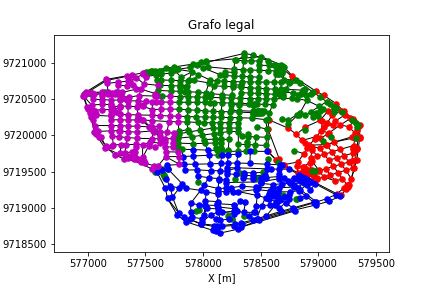

In [33]:
pos = {v:v for v in weighted_G.nodes()}

nx.draw_networkx_nodes(weighted_G, pos=pos, nodelist=node_list_1, node_size=30,node_color='r')
nx.draw_networkx_nodes(weighted_G, pos=pos, nodelist=node_list_2, node_size=30,node_color='g')
nx.draw_networkx_nodes(weighted_G, pos=pos, nodelist=node_list_3, node_size=30,node_color='b')
nx.draw_networkx_nodes(weighted_G, pos=pos, nodelist=node_list_4, node_size=30,node_color='m')
nx.draw_networkx_edges(weighted_G, pos)

# plt.xlim(577000, 579500) #This changes and is problem specific
# plt.ylim(9718500, 9721000) #This changes and is problem specific
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Grafo legal')
# plt.savefig('graph-c.eps', format='eps', rasterized=False)
plt.savefig('graph-c.png')